# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
city_data = []
for index, city_name in enumerate(cities[:5], start=1):
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&units=imperial&appid={weather_api_key}"
    try:
        response = requests.get(url).json()
        city_data.append({
            "city_name": response["name"],
            "long": response["coord"]["lon"],
            "lat": response["coord"]["lat"],
            "humidity": response["main"]["temp"],
            "humidity": response["main"]["humidity"],
            "cloud": response["clouds"]["all"],
            "wind": response["wind"]["speed"]
        })
        print(f"Data collected for {city_name}. {index}/{len(cities)}")
    except:
       print(f"{city_name} not found. {index}/{len(cities)}")

Data collected for beringovskiy. 1/578
Data collected for hobart. 2/578
Data collected for karaidel. 3/578
tsihombe not found. 4/578
Data collected for santa rosa. 5/578


In [4]:
city_data = []
for index, city_name in enumerate(cities, start=1):
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&units=imperial&appid={weather_api_key}"
    try:
        response = requests.get(url).json()
        city_data.append({
            "city_name": response["name"],
            "long": response["coord"]["lon"],
            "lat": response["coord"]["lat"],
            "temp": response["main"]["temp"],
            "humidity": response["main"]["humidity"],
            "cloud": response["clouds"]["all"],
            "wind": response["wind"]["speed"]
        })
        print(f"Data collected for {city_name}. {index}/{len(cities)}")
    except:
       print(f"{city_name} not found. {index}/{len(cities)}")

Data collected for grindavik. 1/589
amderma not found. 2/589
Data collected for pangnirtung. 3/589
Data collected for provideniya. 4/589
Data collected for east london. 5/589
Data collected for cape town. 6/589
Data collected for bredasdorp. 7/589
Data collected for albany. 8/589
Data collected for port alfred. 9/589
Data collected for shimoda. 10/589
Data collected for saint anthony. 11/589
Data collected for barrow. 12/589
Data collected for kruisfontein. 13/589
Data collected for rio gallegos. 14/589
belushya guba not found. 15/589
Data collected for alofi. 16/589
Data collected for hobart. 17/589
Data collected for severo-kurilsk. 18/589
Data collected for bethel. 19/589
Data collected for benguela. 20/589
Data collected for coahuayana. 21/589
Data collected for richards bay. 22/589
Data collected for kapaa. 23/589
Data collected for yiyang. 24/589
Data collected for longyearbyen. 25/589
Data collected for opuwo. 26/589
Data collected for cayenne. 27/589
Data collected for sunrise 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
len(city_data)

533

In [6]:
cities_df = pd.DataFrame(city_data)
cities_df.to_csv("cities_table.csv",index=False)
cities_df.head(5)

,city_name,long,lat,temp,humidity,cloud,wind
0,Grindavik,-22.4338,63.8424,50.47,100,100,9.22
1,Pangnirtung,-65.7125,66.1451,46.87,93,95,4.27
2,Provideniya,-173.3000,64.3833,49.01,71,48,3.89
3,East London,27.9116,-33.0153,65.34,88,75,5.75
4,Cape Town,18.4232,-33.9258,57.34,83,0,11.50


In [7]:
cities_df.describe()

,long,lat,temp,humidity,cloud,wind
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,18.343725,21.270877,66.526848,69.393996,52.198874,7.753002
std,91.438016,33.765843,15.048506,21.148742,39.291443,5.101177
min,-175.200000,-54.800000,28.580000,6.000000,0.000000,0.000000
25%,-65.102300,-8.767600,53.290000,58.000000,10.000000,3.710000
50%,24.200800,28.017000,69.100000,75.000000,56.000000,6.800000
75%,98.779200,49.816700,78.440000,85.000000,95.000000,10.360000
max,179.316700,78.218600,98.740000,100.000000,100.000000,25.460000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
cities_df[cities_df["humidity"] > 100]

,city_name,long,lat,temp,humidity,cloud,wind


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:xlabel='lat', ylabel='temp'>

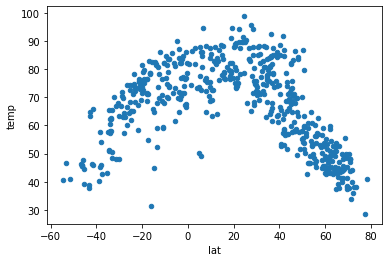

In [13]:
cities_df[["lat", "temp"]].plot.scatter("lat", "temp")

## Latitude vs. Humidity Plot

<AxesSubplot:xlabel='lat', ylabel='humidity'>

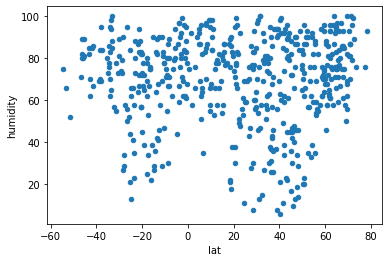

In [14]:
cities_df[["lat", "humidity"]].plot.scatter("lat", "humidity")

## Latitude vs. Cloudiness Plot

<AxesSubplot:xlabel='lat', ylabel='cloud'>

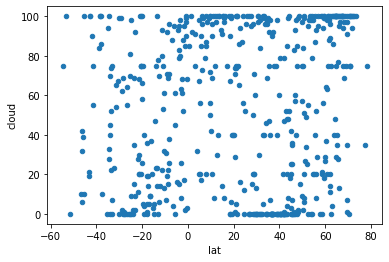

In [15]:
cities_df[["lat", "cloud"]].plot.scatter("lat", "cloud")

## Latitude vs. Wind Speed Plot

<AxesSubplot:xlabel='lat', ylabel='wind'>

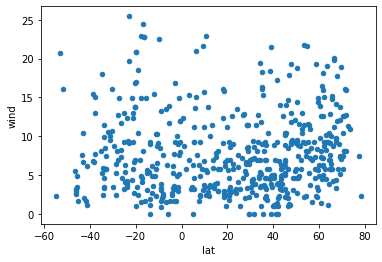

In [16]:
cities_df[["lat", "wind"]].plot.scatter("lat", "wind")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

LinregressResult(slope=-0.6506697755713368, intercept=92.5784978732311, rvalue=-0.7960068302692694, pvalue=6.178105618269745e-81, stderr=0.026004670736482913, intercept_stderr=1.1765233074300858)


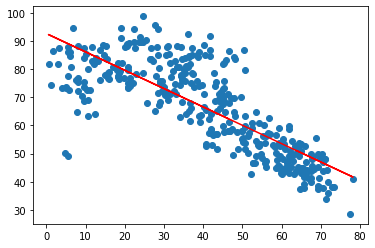

In [26]:
x = cities_df[cities_df["lat"] > 0]["lat"]
y = cities_df[cities_df["lat"] > 0]["temp"]
regression = linregress(x, y)
print(regression)
plt.scatter(x,y)
plt.plot(x, regression.slope*x + regression.intercept, color="r")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

LinregressResult(slope=0.6885745737365213, intercept=81.85671200632663, rvalue=0.7260016138950606, pvalue=5.910390458915786e-29, stderr=0.05047191248255542, intercept_stderr=1.243790513661293)


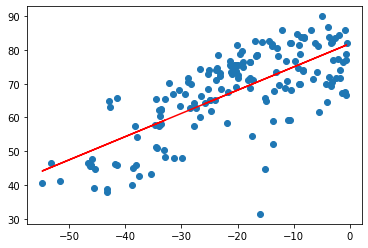

In [27]:
x = cities_df[cities_df["lat"] < 0]["lat"]
y = cities_df[cities_df["lat"] < 0]["temp"]
regression = linregress(x, y)
print(regression)
plt.scatter(x,y)
plt.plot(x, regression.slope*x + regression.intercept, color="r")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

LinregressResult(slope=0.0670266141413657, intercept=66.36548130838445, rvalue=0.05951657447074436, pvalue=0.25738119723012953, stderr=0.05908599042721142, intercept_stderr=2.6732138078056313)


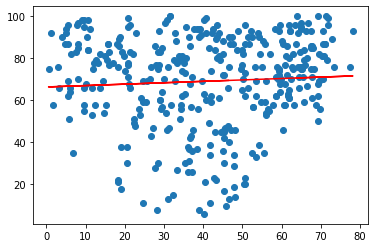

In [28]:
x = cities_df[cities_df["lat"] > 0]["lat"]
y = cities_df[cities_df["lat"] > 0]["humidity"]
regression = linregress(x, y)
print(regression)
plt.scatter(x,y)
plt.plot(x, regression.slope*x + regression.intercept, color="r")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

LinregressResult(slope=-0.03139839088652598, intercept=69.37803264316679, rvalue=-0.02202897772004041, pvalue=0.7761913675968743, stderr=0.110267977929788, intercept_stderr=2.7173581931749924)


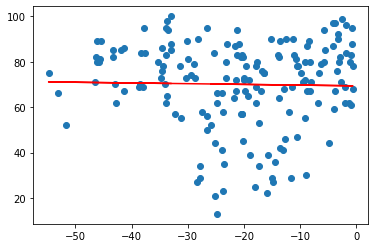

In [29]:
x = cities_df[cities_df["lat"] < 0]["lat"]
y = cities_df[cities_df["lat"] < 0]["humidity"]
regression = linregress(x, y)
print(regression)
plt.scatter(x,y)
plt.plot(x, regression.slope*x + regression.intercept, color="r")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

LinregressResult(slope=0.11749716155736006, intercept=50.67262092792126, rvalue=0.05706056341979994, pvalue=0.2775734113827655, stderr=0.10805101962942562, intercept_stderr=4.888527306260303)


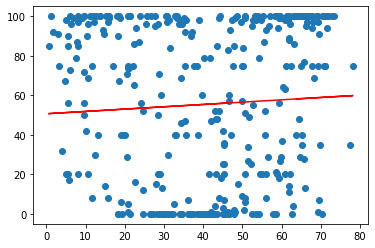

In [30]:
x = cities_df[cities_df["lat"] > 0]["lat"]
y = cities_df[cities_df["lat"] > 0]["cloud"]
regression = linregress(x, y)
print(regression)
plt.scatter(x,y)
plt.plot(x, regression.slope*x + regression.intercept, color="r")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

LinregressResult(slope=0.08460552539032423, intercept=46.92134359804357, rvalue=0.03140595280117532, pvalue=0.6852222601407738, stderr=0.20835994403611885, intercept_stderr=5.13466023124633)


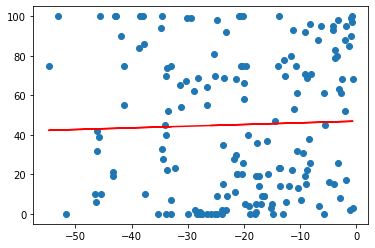

In [31]:
x = cities_df[cities_df["lat"] < 0]["lat"]
y = cities_df[cities_df["lat"] < 0]["cloud"]
regression = linregress(x, y)
print(regression)
plt.scatter(x,y)
plt.plot(x, regression.slope*x + regression.intercept, color="r")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

LinregressResult(slope=0.04454944083960649, intercept=5.815339693237013, rvalue=0.18120302925711299, pvalue=0.0005126761353457859, stderr=0.012707874233137672, intercept_stderr=0.5749394166410742)


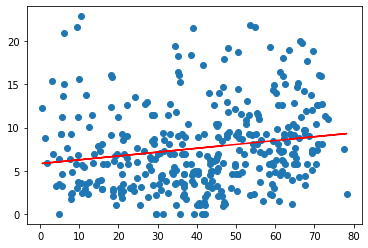

In [32]:
x = cities_df[cities_df["lat"] > 0]["lat"]
y = cities_df[cities_df["lat"] > 0]["wind"]
regression = linregress(x, y)
print(regression)
plt.scatter(x,y)
plt.plot(x, regression.slope*x + regression.intercept, color="r")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

LinregressResult(slope=-0.016007893439260002, intercept=7.6811903605280225, rvalue=-0.03770302286939934, pvalue=0.6264888709098089, stderr=0.03283151165031233, intercept_stderr=0.80907421041223)


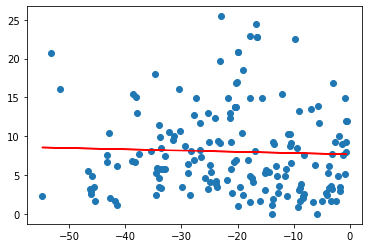

In [33]:
x = cities_df[cities_df["lat"] < 0]["lat"]
y = cities_df[cities_df["lat"] < 0]["wind"]
regression = linregress(x, y)
print(regression)
plt.scatter(x,y)
plt.plot(x, regression.slope*x + regression.intercept, color="r")
plt.show()